In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)


In [4]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer='adam',
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])


In [6]:

history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8448 - loss: 0.5456 - val_accuracy: 0.9560 - val_loss: 0.1552
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9597 - loss: 0.1384 - val_accuracy: 0.9629 - val_loss: 0.1259
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9731 - loss: 0.0904 - val_accuracy: 0.9693 - val_loss: 0.1033
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9810 - loss: 0.0641 - val_accuracy: 0.9729 - val_loss: 0.0875
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9846 - loss: 0.0497 - val_accuracy: 0.9717 - val_loss: 0.0938
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9879 - loss: 0.0395 - val_accuracy: 0.9713 - val_loss: 0.1017
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9909 - loss: 0.0291 - val_accuracy: 0.9744 - val_loss: 0.0896
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9922 - loss: 0.0268 - val_accuracy: 0.

In [7]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9716 - loss: 0.1081
Test Loss: 0.0872
Test Accuracy: 0.9760


In [9]:
predictions = model.predict(X_test)
pred_classes = np.argmax(predictions, axis=1)
pred_probs = np.max(predictions, axis=1)

for i in range(5):
    print(f"True Class: {y_test[i]}, Predicted Class: {pred_classes[i]}, Probabilities: {pred_probs[i]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
True Class: 7, Predicted Class: 7, Probabilities: 0.9999872446060181
True Class: 2, Predicted Class: 2, Probabilities: 1.0
True Class: 1, Predicted Class: 1, Probabilities: 0.9992243051528931
True Class: 0, Predicted Class: 0, Probabilities: 0.9992895126342773
True Class: 4, Predicted Class: 4, Probabilities: 0.9998910427093506


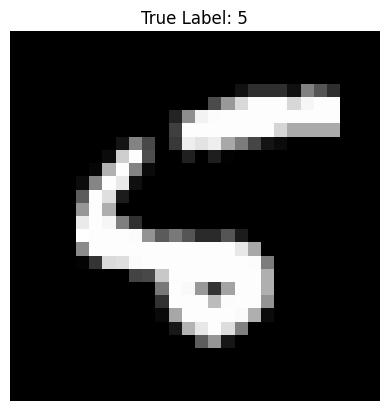

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Class 0: 0.0000
Class 1: 0.0000
Class 2: 0.0000
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.9901
Class 6: 0.0099
Class 7: 0.0000
Class 8: 0.0000
Class 9: 0.0000

Predicted Class: 5


In [13]:
def predict_digit(index):
    img = X_test[index]
    plt.imshow(img, cmap='gray')
    plt.title(f"True Label: {y_test[index]}")
    plt.axis('off')
    plt.show()

    pred_prob = model.predict(img.reshape(1,28,28))[0]

    for i, prob in enumerate(pred_prob):
        print(f"Class {i}: {prob:.4f}")

    predicted_class = np.argmax(pred_prob)
    print(f"\nPredicted Class: {predicted_class}")

predict_digit(8)